Dato: Se crea de manera manual una carpeta en Google Drive con el nombre 'csv afip' donde subimos los archivos de Corpus otorgado por afip.

Instalamos la libreria de Geminis

Seleccionamos cantidad de preguntas elegidas de manera random

Vamos a pedir acceso a google drive.

In [1]:

import os
import json
from tqdm import tqdm

DATA_PATH = ''
ID_COUNT = 0
# Ruta base: directorio actual del proyecto
BASE_PATH = os.getcwd()

# Nombre del directorio a crear
name_dir = 'response_npl'

# Ruta completa al nuevo directorio
output_dir_path = os.path.join(BASE_PATH, name_dir)
print(f"Ruta completa: {output_dir_path}")

# Ruta del archivo data.json dentro del nuevo directorio
DATA_PATH = os.path.join(output_dir_path, 'data.json')

# Verifica si el directorio existe; si no, lo crea
if not os.path.exists(output_dir_path):
    print(f"Creando directorio: {output_dir_path}")
    os.makedirs(output_dir_path, exist_ok=True)
else:
    print(f"El directorio ya existe: {output_dir_path}")



Ruta completa: C:\Users\WilliamAcer\PycharmProjects\Tesis\response_npl
El directorio ya existe: C:\Users\WilliamAcer\PycharmProjects\Tesis\response_npl


Vamos a crear, si no existe, el directorio del archivo de datos para guardar nuestro historial de solicitudes.

In [2]:
name_dir = 'response_npl'
output_dir_path = os.path.join(BASE_PATH, name_dir)
print(output_dir_path)
DATA_PATH = output_dir_path + '/data.json'

if not os.path.exists(output_dir_path):
  print(f"Making directory: {output_dir_path}")
  os.makedirs(output_dir_path, exist_ok=True)
else:
  print(f"Directory: {output_dir_path} already exists")

C:\Users\WilliamAcer\PycharmProjects\Tesis\response_npl
Directory: C:\Users\WilliamAcer\PycharmProjects\Tesis\response_npl already exists


Creamos un directorio para generar la salida del csv

Creamos en directorio donde vamos a guardar el csv final

In [3]:
name_dir_csv = 'response_csv'
output_dir_path_csv = os.path.join(output_dir_path, name_dir_csv)
print(output_dir_path_csv)

if not os.path.exists(output_dir_path_csv):
  print(f"Making directory: {output_dir_path_csv}")
  os.makedirs(output_dir_path_csv, exist_ok=True)
else:
  print(f"Directory: {output_dir_path_csv} already exists")

C:\Users\WilliamAcer\PycharmProjects\Tesis\response_npl\response_csv
Directory: C:\Users\WilliamAcer\PycharmProjects\Tesis\response_npl\response_csv already exists


In [4]:
print(DATA_PATH)

if not os.path.isfile(DATA_PATH):
  print('Creamos el archivo data.json')
  data = {}
  data['responses'] = []
  with open(DATA_PATH, 'w') as f:
      data = json.dump(fp=f, obj=data, indent=4)
  ID_COUNT = 0
else:
  with open(DATA_PATH) as f:
    data = json.load(f)
  ID_COUNT =len(data['responses'])
  print('Cargamos el archivo data.json con id_count en '+ str(ID_COUNT))

C:\Users\WilliamAcer\PycharmProjects\Tesis\response_npl/data.json
Cargamos el archivo data.json con id_count en 8


In [5]:
data

{'responses': [{'id': 0,
   'type': 'entidad',
   'data': '<think>\nOkay, I need to generate a list of questions about AFIP monotributo for the user. The user wants these as real queries someone might ask. They provided an example with 10 questions.\n\nFirst, they want all questions in Spanish and numerated without any repetition or exact duplicates. Each question should vary its approach while maintaining the main focus on AFIP monotributo.\n\nI\'ll start by listing different aspects: eligibility criteria, types of assistance, periods involved, application process, implications for other services, legal references, benefits, duration, impact beyond the zone, and compliance with regulations.\n\nI need to make sure each question is clear, specific, and relevant. I\'ll also vary the verbs used like "cules," "características," "características de los montos," etc., to keep them distinct.\n</think>\n\n1. ¿Qué entidades pueden solicitar préstamos para la realización de obras en el monotribu

Cargamos el corpus

In [6]:
import pandas as pd
dirCSV = BASE_PATH + '/csv afip/'
nameFileCVS='/DS1_usuario_afip.csv'

#Cargar CSV de Afip
urlcsv = dirCSV + nameFileCVS
#df = pd.read_csv(urlcsv, on_bad_lines='skip')

newDir = 'response_csv_part'
output_dir_path_csv_part = os.path.join(dirCSV, newDir)
print(output_dir_path_csv_part)

if not os.path.exists(output_dir_path_csv_part):
  print(f"Making directory: {output_dir_path_csv_part}")
  os.makedirs(output_dir_path_csv_part, exist_ok=True)
else:
  print(f"Directory: {output_dir_path_csv_part} already exists")

C:\Users\WilliamAcer\PycharmProjects\Tesis/csv afip/response_csv_part
Directory: C:\Users\WilliamAcer\PycharmProjects\Tesis/csv afip/response_csv_part already exists


In [ ]:
LIST_CORPUS = df["Texto"].tolist()

In [ ]:
LIST_CORPUS

['¿Puedo darme de baje por el tiempo en que no realice la actividad luego darme de alta cuando la retome?',
 'Si dejo de trabajar por un tiempo, ¿puedo darme de baja y luego volver a darme de alta?',
 '¿Puedo dar de baja mi monotributo y transcurrido un período de tiempo, darme de alta nuevamente?',
 '¿Es obligatorio seguir inscripto en el régimen si dejo de ejercer mi actividad?',
 '¿Qué sucede si me doy de baja y luego retomo mi actividad?',
 '¿Me tengo que dar de alta de nuevo si me doy de baja y luego retomo mi actividad?',
 '¿Puedo suspender mi inscripción hasta que retome mi actividad?',
 '¿Se puede interrumpir la inscripción del monotributo hasta que vuelva a ejercer mi actividad?',
 '¿Puedo quedar excluido del Monotributo?',
 '¿Por qué puedo quedar excluido del Monotributo?',
 '¿AFIP me puede excluir del Monotributo?',
 '¿Puedo quedar fuera del Monotributo?',
 '¿Cuáles son las causales de exclusión del Monotributo?',
 '¿Con qué motivos me pueden dejar fuera del Monotributo?',
 

In [8]:
list_of_etiquetas = df["Etiqueta"].unique().tolist()
for etiqueta in list_of_etiquetas:
  dfpart = df.loc[df['Etiqueta'] == etiqueta ]
  nameCsv = '/'+etiqueta+'.csv'
  with open(output_dir_path_csv_part+nameCsv, 'w') as f:
    dfpart.to_csv(f)

print('Se dividio el corpus por etiquetas en la siguiente direccion: ')
print(output_dir_path_csv_part)

NameError: name 'df' is not defined

1ra PARTE

Ahora empieza una iteración por cada etiqueta, esto se tiene que hacer de manera manual por las limintaciones que tiene BARD

In [11]:
dfCorpus = pd.DataFrame()

In [60]:
#Cargar CSV de Afip
etiqueta = 'temporal'
urlcsv = output_dir_path_csv_part +'/'+ etiqueta +'.csv'
df = pd.read_csv(urlcsv, on_bad_lines='skip')

In [61]:
df

,Unnamed: 0,IUCA,Texto,Etiqueta
0,24,3,Si me di de baja el monotributo por que ya no ...,temporal
1,26,3,Si me di de baja el monotributo porque ya no r...,temporal
2,31,4,Si AFIP me excluye del Monotributo ¿Cuándo pue...,temporal
3,32,4,"En caso de quedar excluido del Monotributo, ¿C...",temporal
4,33,4,¿Cuánto tiempo tiene que trancurrir desde que ...,temporal
...,...,...,...,...
110,1343,118,¿Cuándo se debe abonar la primera cuota en cas...,temporal
111,1346,121,¿Cuál es la fecha de vencimiento de la obligac...,temporal
112,1355,130,"En caso de solicitar la baja en el régimen, ¿a...",temporal
113,1362,137,¿A partir de qué período figura la información...,temporal


Tomo 50 preguntas elegidas al azar

In [62]:
CANTIDAD_PREGUNTAS = 50
if len(df.value_counts())>50:
  df = df.sample(n = CANTIDAD_PREGUNTAS)


In [63]:
df.count()

Unnamed: 0    50
IUCA          50
Texto         50
Etiqueta      50
dtype: int64

Vamos a crear un archivo con todas las preguntas para ejecutarlas en el cluster

In [64]:
dfCorpus = pd.concat([dfCorpus, df], ignore_index=True)

In [65]:
dfCorpus

,Unnamed: 0,IUCA,Texto,Etiqueta
0,957,126,¿Cuáles son las entidades bancarias habilitada...,entidad
1,958,126,¿Dónde pago el VEP?,entidad
2,960,126,¿Cuáles son los bancos habilitados para el pag...,entidad
3,1351,126,¿Cuáles son las entidades bancarias habilitada...,entidad
4,270,36,¿Dónde debo solitar la CUIT?,ubicacion
...,...,...,...,...
355,1355,130,"En caso de solicitar la baja en el régimen, ¿a...",temporal
356,1149,150,"¿Cuántos años debo mantener los comprobantes, ...",temporal
357,1362,137,¿A partir de qué período figura la información...,temporal
358,46,6,¿Desde cuándo tiene vigencia la baja del Monot...,temporal


In [66]:
dfCorpus.count()

Unnamed: 0    360
IUCA          360
Texto         360
Etiqueta      360
dtype: int64

In [67]:
print(dfCorpus["Etiqueta"].value_counts())

Etiqueta
manera           50
procedimiento    50
si_no            50
temporal         50
referencia       50
razon            50
definicion       40
ubicacion         9
cantidad          7
entidad           4
Name: count, dtype: int64


In [68]:
with open(output_dir_path_csv+'/corpusDataCluster.csv', 'w') as f:
  dfCorpus.to_csv(f)

In [11]:
import requests

def chat_with_ollama(prompt, model='deepseek-r1:14b'):
    url = 'http://localhost:11434/api/generate'
    data = {
        'model': model,
        'prompt': prompt,
        'stream': False
    }

    response = requests.post(url, json=data)
    if response.status_code == 200:
        return response.json()['response']
    else:
        return f'Error: {response.status_code} - {response.text}'

# Ejemplo de uso


In [13]:
import json
res = {}
# función para obtener una respuesta de LLM
def entryQueryInLLM(questionType,example):
  global ID_COUNT
  # Instrution Learning con mejores resultados que encontre:
  input_text = 'Genera exclusivamente una lista de preguntas del tipo "'+questionType+'", relacionadas con el tema Monotributo de AFIP, como si fueran consultas reales que podrían hacer los usuarios. Las preguntas deben compartir la intención del siguiente ejemplo: Ejemplo de pregunta del tipo "'+questionType+'": '+example+'Devuelve únicamente una lista numerada con al menos 10 preguntas distintas, todas coherentes con el tipo de intención y el tema. No repitas estructuras exactas. Varía el enfoque, pero mantené la intención de fondo. En español.'
  # Send an API request and get a response.
  try:
    responseLLM = chat_with_ollama(input_text)
    print(responseLLM)
   # listCandidates = responseLLM.candidates
    response = {}
    response['id'] = ID_COUNT
    response['type'] = questionType
    response['data'] = responseLLM
    print(response)
    data['responses'].append(response)
    with open(DATA_PATH, 'w') as f:
              json.dump(fp=f, obj=data, indent=4)
    ID_COUNT += 1
  except:
    print(responseLLM)


Funcion de generacion de preguntas

In [14]:
def generatorQueryInLLM(dframe):
  for i in tqdm(range(len(dframe))):
    print('Solicitud enviada Nro: '+str(i))
    entryQueryInLLM(dframe.iloc[i]['Etiqueta'],dframe.iloc[i]['Texto'])


Generar Preguntas desde DataFrame

In [15]:
generatorQueryInLLM(df)

  0%|          | 0/4 [00:00<?, ?it/s]

Solicitud enviada Nro: 0


 25%|██▌       | 1/4 [08:39<25:57, 519.20s/it]

<think>
Okay, so I need to create a list of questions about the Monotributo from AFIP, specifically in the "entidad" format. The example given is something like "¿Cuáles son las entidades bancarias habilitadas para el pago del VEP?" which translates to "Which banking entities are enabled for paying the VEP?"

First, I should understand what the Monotributo is. From what I know, Monotributo is a tax system in Argentina where small businesses and self-employed individuals can pay taxes under a single contribution. So, it's related to taxation for micro-enterprises.

Now, the user wants questions that are consultative, like real-life inquiries someone might have. The key here is to vary the focus but keep the intention around entities (entidades) related to Monotributo.

Let me think about different aspects where one might ask about entities:

1. Payment methods: Which entities can I use to pay my Monotributo contributions?
2. Types of entities: Are there specific types, like banks or fin

 50%|█████     | 2/4 [16:02<15:49, 474.56s/it]

<think>
Okay, so I'm trying to understand what the user is asking for here. They want me to generate a list of questions about the Monotributo from AFIP. The examples given are all about where or how to pay certain taxes or fees. 

First, I need to make sure I know what Monotributo is. From what I remember, it's a tax system in Argentina for small businesses and self-employed individuals. So, people under this regime would have different obligations regarding their payments.

The user wants questions that are similar to the example: "¿Dónde pago el VEP?" which translates to "Where do I pay the VEP?" They provided 10 such questions, all about payment methods or places related to Monotributo.

I should think of other possible tax-related terms specific to Monotributo. Maybe things like the "Contribuyente", different types of payments like taxes, fees, insurance contributions, etc. Also, ways to make these payments, whether online, through banks, or at an office.

I need to vary the quest

 75%|███████▌  | 3/4 [19:40<05:57, 357.30s/it]

<think>
Okay, the user wants me to generate a list of "entity" type questions related to the Monotributo from AFIP in Spanish. They provided an example about banks allowed for VEP payments and specified that each question should have unique structures but share the same intention.

First, I need to understand what "entidad" means here. It refers to specific entities or institutions, like government agencies, organizations, or systems related to the Monotributo. So, the questions should ask about these entities.

I'll brainstorm different aspects of the Monotributo where one might ask about specific entities. That could include local offices, online platforms for payments, fiscal associations, unions, information centers, legal services, tax agencies in other countries, consulting firms, payment systems, and regional divisions like ZATs.

Next, I'll frame each as a question. For example, asking which offices handle Monotributo queries, what digital platforms are used for payments, or wh

100%|██████████| 4/4 [24:30<00:00, 367.52s/it]

<think>
Okay, so I need to come up with a list of questions related to the Monotributo from AFIP, specifically focusing on "entidad." The example given is about banking entities for VEP payment, so I guess "entidad" here refers to organizations or institutions involved in some process.

First, I should understand what the Monotributo is. From what I know, it's a tax system in Argentina where small businesses and self-employed individuals can pay taxes under a simplified scheme. So entities related to this could be banks handling payments, government bodies managing the system, or maybe other financial institutions involved.

The user provided 10 questions, all in Spanish, each starting with "¿Cuáles..." asking about specific types of entities. I need to make sure my list is at least 10 distinct questions, not repeating structures but keeping the intent clear.

Let me think about different aspects related to Monotributo and entities:

1. Banks or financial institutions that process paym

hasta este paso se genero solicitudes al LLM para generar texto, por cada etiqueta hay que repetir este procedimiento.

todas las respuestas hasta el momento quedan guardadas en data.json en response_npl




In [16]:
data

{'responses': [{'id': 0,
   'type': 'entidad',
   'data': '<think>\nOkay, I need to generate a list of questions about AFIP monotributo for the user. The user wants these as real queries someone might ask. They provided an example with 10 questions.\n\nFirst, they want all questions in Spanish and numerated without any repetition or exact duplicates. Each question should vary its approach while maintaining the main focus on AFIP monotributo.\n\nI\'ll start by listing different aspects: eligibility criteria, types of assistance, periods involved, application process, implications for other services, legal references, benefits, duration, impact beyond the zone, and compliance with regulations.\n\nI need to make sure each question is clear, specific, and relevant. I\'ll also vary the verbs used like "cules," "características," "características de los montos," etc., to keep them distinct.\n</think>\n\n1. ¿Qué entidades pueden solicitar préstamos para la realización de obras en el monotribu

2da PARTE




Función para limpiar los string extraidos del data

In [41]:
import re
def funtionCleanQuery(listQ):
  #reIsQuery = re.compile('\?')

  listQuerysFinal= []
  for p in listQ:
    p = p.replace('\n','')
    #p = p.replace('*','')
    # Caso de que no sea una pregunta
    #print(p)
    #print(reIsQuery.search(p))
    if reIsQuery.search(p):
      listQuerysFinal.append(p)
  # saco duplicados sintacticamente
  return list(set(listQuerysFinal))

<>:3: SyntaxWarning: invalid escape sequence '\?'
<>:3: SyntaxWarning: invalid escape sequence '\?'
C:\Users\WilliamAcer\AppData\Local\Temp\ipykernel_11796\1329703103.py:3: SyntaxWarning: invalid escape sequence '\?'
  reIsQuery = re.compile('\?')


Funcion que limpia Duplicados

In [ ]:
def funtionCleanDuplicates(listQ,df,list_corpus):
  res= []
  list_of_single_column = df["Texto"].tolist()
  for q in listQ:
    #me aseguro que no este repetido en mis resultados
    if q not in list_of_single_column:
     # me aseguro que no este en el corpus original
      if q not in list_corpus:
        res.append(q)
      else:
        print('eliminado')
  return res

Se crea una funcion para extreaer la información relevente de  los resultados obtenidos en data en un dataFrame

In [43]:
import pandas as pd
from tqdm import tqdm

dfres = pd.DataFrame(columns=['Texto', 'Etiqueta'])
 # Expresion regular de extracción de pregunta
requery = re.compile(r'¿.*?\?')

final = []
for res in tqdm(data['responses'],desc='Procesando'):
  #if res['id']<4:
    #print('Procesando respuesta id: '+str(res['id']))
    resLLM = res['data']
    #resSting = resbard['content'].lower()
    # busco en las posibles respuestas que me devuelve BARD
    final = requery.findall(resLLM.lower())
       #print(f'LA RESPUESTA CON ID: '+str(res['id'])+' NO CONTIENE PREGUNTAS')
    #Procesamiento de Lista de preguntas
    #final = funtionCleanQuery(final)
    #final = funtionCleanDuplicates(final,dfres,LIST_CORPUS)
    #Guardado
    for f in final:
      f = f.replace('*','')
      d = {'Texto': f, 'Etiqueta': res['type']}
      dfres = pd.concat([dfres, pd.DataFrame(d, index=[0])], ignore_index=True)

Procesando: 100%|██████████| 4/4 [00:00<00:00, 330.64it/s]


In [44]:
dfres

,Texto,Etiqueta
0,¿qué entidades pueden solicitar préstamos para...,entidad
1,¿qué tipologías de entidades son admitidas par...,entidad
2,¿cómo se determinan los montos maximos que una...,entidad
3,¿cuál es la periodicidad para solicitar présta...,entidad
4,¿qué entidades no son admitidas para solicitar...,entidad
5,¿cómo se calculan los intereses de los préstam...,entidad
6,¿qué entidades requieren una licencia específi...,entidad
7,¿cómo se procedure a la solicitud de préstamos...,entidad
8,¿qué implica la apuración del vep en el contex...,entidad
9,¿cuál es el role del afip en la financiación d...,entidad


In [45]:
print(dfres.count())

Texto       41
Etiqueta    41
dtype: int64


In [46]:
print(dfres["Etiqueta"].value_counts())

Etiqueta
entidad    41
Name: count, dtype: int64


In [ ]:
with open(output_dir_path_csv+'/responseData.csv', 'w') as f:
  dfres.to_csv(f)

In [ ]:
dfres.to_csv('dfresLLM.csv')
from google.colab import files
files.download('dfresLLM.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import torch
model = torch.load('/content/drive/MyDrive/Colab Notebooks/Tesis/csv afip/BackupBARD/model/model.pt',weights_only=False)


KeyboardInterrupt: 

In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer

model = BertForSequenceClassification.from_pretrained('/content/drive/MyDrive/Colab Notebooks/Tesis/response_npl/bert_model')
tokenizer = BertTokenizer.from_pretrained('/content/drive/MyDrive/Colab Notebooks/Tesis/response_npl/tokenizer')


In [ ]:
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(31002, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
import pandas as pd
import re
import unicodedata

correccion_palabras = { 'aherir' : 'adherir', 'aniticipo' : 'anticipo', 'baje' : 'baja','caracterísiticas' : 'caracteristicas','caragas' : 'cargas',
                        'caratacterísticas' : 'caracteristicas','condiminios' : 'condominios','constribuyentes' : 'contribuyentes','deden' : 'deben',
                        'incripto' : 'inscripto','infromé' : 'informe','inregular' : 'irregular','inscriibirme' : 'inscribirme','monostributista' : 'monotributista',
                        'monotribustistas' : 'monotributistas','monotributisa' : 'monotributista','monotributistas' : 'monotributistas',
                        'opraciones' : 'operaciones','parámentros' : 'parametros','permanezo' : 'permanezco','porciento' : 'por ciento',
                        'porqué' : 'por que','previsioanl' : 'previsional','qié' : 'que','registo' : 'registro','reitegren' : 'reintegren',
                        'requisistos' : 'requisitos','resposable' : 'responsable','semetre' : 'semestre','siginifica' : 'significa',
                        'situadios' : 'situados','solitar' : 'solicitar','trancurrir' : 'transcurrir' }

def preprocesamiento(texto):
    texto = re.sub(r'[^\w ¿?%/()]', "", texto)   #Eliminar TODO menos: \w = alphanum y ¿?%/
    texto = texto.lower()  #Texto a minúscula
    #Reescritura de palabras mal escritas
    texto = ''.join(correccion_palabras[w] if w in correccion_palabras else w for w in re.split(r'(\W+)', texto))
    #Eliminar acentos ==> VER SI NO LO HAGO PORQUE BERT/BETO TIENE ACENTOS
    texto = ''.join(c for c in unicodedata.normalize('NFD', texto) if unicodedata.category(c) != 'Mn')
    #Remover letras con 2 ocurrencias (con excepciones)
    letras_dobles = "abdfghijkmnñpqstuvwxyz" # Excepciones: ee-cc-ll-rr-oo (y mayus)
    letras_dobles += letras_dobles.upper()
    texto = re.sub("(?P<char>[" + re.escape(letras_dobles) + "])(?P=char)+", r"\1", texto)
    #remover caracteres que se repiten al menos 3 veces
    texto = re.sub(r'([\w\W])\1{2,}', r'\1', texto)
    #remover palabras que se repiten
    texto = re.sub(r'\b(\w+)(\b\W+\b\1\b)*', r'\1', texto)
    #Eliminar repetición de espacios
    texto = re.sub(r"\s{2,}", " ", texto)
    return texto

def procesar_sentencias(sentencias):
    sentencias_limpias = []
    for s in sentencias:
        clean = preprocesamiento(s)
        sentencias_limpias.append(clean)
    return sentencias_limpias

def load_dataset(filename):
  #df = pd.read_csv("DS1_usuario_afip.csv",engine='python', error_bad_lines=False)
  df = pd.read_csv(filename, encoding = "utf-8", names = ["IUCA","Texto", "Etiqueta"], header=0)
  df = df.drop_duplicates(subset=["Texto"], keep="first")
  print("Carga Dataset:\n", df.head())
  print("Cantidad de Sentencias:", df.shape[0])
  #df["Texto"] = procesar_sentencias(df["Texto"])
  #print(df.head())
  sentencias = list(df["Texto"])
  etiquetas = list(df["Etiqueta"])
  return sentencias, etiquetas
urlarchivoCSVaCLASIFICAR = '/content/drive/MyDrive/Colab Notebooks/Tesis/response_npl/response_csv/responseData.csv'
DS_NAME = urlarchivoCSVaCLASIFICAR
sent_train,etiq_train = load_dataset(DS_NAME)


print("\nCONJUNTO TRAINING: Preprocesamiento")
print("Datos a procesar:")
print(*(sent_train[:5]), sep="\n", end="\n...\n")
sent_train = procesar_sentencias(sent_train)
print("Datos procesados:")
print(*(sent_train[:5]), sep="\n", end="\n...\n")

#Guardamos los Conjuntos TRAINING (df_train) y TEST (df_test)
df_train = pd.DataFrame(columns=["Texto", "Etiqueta"])
df_train['Texto'] = sent_train
df_train['Etiqueta'] = etiq_train

print("\nCONJUNTO TRAINING CREADO:\n",df_train.head())



print('\n>>TRAINING SET: {}'.format(df_train.shape[0]))

Carga Dataset:
    IUCA                                              Texto  Etiqueta
0     0  ¿cuánto es el ingreso bruto anual máximo permi...  cantidad
1     1  ¿cuántos metros cuadrados puede tener el local...  cantidad
2     2  ¿cuál es el consumo máximo de energía eléctric...  cantidad
3     3            ¿cuántos empleados puedo tener a cargo?  cantidad
4     4  ¿cuánto puedo cobrar como precio unitario máxi...  cantidad
Cantidad de Sentencias: 4743

CONJUNTO TRAINING: Preprocesamiento
Datos a procesar:
¿cuánto es el ingreso bruto anual máximo permitido?
¿cuántos metros cuadrados puede tener el local afectado a la actividad?
¿cuál es el consumo máximo de energía eléctrica anual que puedo tener?
¿cuántos empleados puedo tener a cargo?
¿cuánto puedo cobrar como precio unitario máximo de mis servicios o bienes?
...
Datos procesados:
¿cuanto es el ingreso bruto anual maximo permitido?
¿cuantos metros cuadrados puede tener el local afectado a la actividad?
¿cual es el consumo maximo de

In [ ]:
from unicodedata import normalize
import re

def normalizar_texto(texto):
    # Garantiza que el parametro es texto
    texto_normalizado = str(texto)
    # Transforma el texto en minúsculas
    texto_normalizado = texto_normalizado.lower()
    # Quita las tildes a las palabras, la dieresis a la ü y la ~ a la ñ
    texto_normalizado = normalize(
        'NFKD', texto_normalizado).encode('ascii', errors='ignore').decode('utf-8')
    # Reemplaza los números por ceros
    texto_normalizado = re.sub(r'\d', '0', texto_normalizado)
    # Reemplaza puntos por comas (esto lo hago por los números decimales)
    texto_normalizado = re.sub(r'\.', ',', texto_normalizado)
    # Quita las comas que no estén entre números
    texto_normalizado = re.sub(r'(?<!\d),(?!\d)', ' ', texto_normalizado)
    # Quita los caracteres que no sean letras, números o comas, como signos de puntuación (diferentes de la coma)
    texto_normalizado = re.sub(r'[^a-z0,]', ' ', texto_normalizado)
    # Quita los espacios que sobren entre palabras
    texto_normalizado = re.sub(r'[\s\n\r]+', ' ', texto_normalizado)
    # Quita los espacios al comienzo y al final del texto
    texto_normalizado = texto_normalizado.strip(' \n\t\r')
    return texto_normalizado

In [ ]:
#BERT trabaja con un formato específico en los datos de entrada:
# Inicio de sentencia: token [CLS] (indicamos a BERT que estamos en una Tarea de Clasificación)
# Fin de sentencia: token [SEP]
print("CONJUNTO TRAINING: Formatear sentencias\n")
sentencias = df_train['Texto']
sentencias_formato = ["[CLS] "+i+" [SEP]" for i in sentencias]
print(">>Cantidad de sentencias formateadas:",len(sentencias_formato))
print("\n1° sentencia formateada:", sentencias_formato[0])

CONJUNTO TRAINING: Formatear sentencias

>>Cantidad de sentencias formateadas: 4743

1° sentencia formateada: [CLS] ¿cuanto es el ingreso bruto anual maximo permitido? [SEP]


In [ ]:
from sklearn.preprocessing import LabelEncoder
#Convertir Nombres de Etiquetas a Número=> 0-10

print("Conversión de Etiquetas")
le = LabelEncoder()
print("\nCONJUNTO TRAINING")
etiq_codif = le.fit_transform(df_train["Etiqueta"])
print("Index - Etiqueta    Frecuencia")
for i,c in enumerate(le.classes_):
  etiq_frec = ((df_train[df_train['Etiqueta']==c]['Etiqueta']).value_counts()).to_string()
  print("",i,"-",etiq_frec)
df_train['Etiqueta'] = etiq_codif

#Decodificar etiquetas
def revertir_etiquetas(etiquetas):
  return le.inverse_transform(etiquetas)

Conversión de Etiquetas

CONJUNTO TRAINING
Index - Etiqueta    Frecuencia
 0 - Etiqueta
cantidad    77
 1 - Etiqueta
definicion    449
 2 - Etiqueta
entidad    47
 3 - Etiqueta
manera    582
 4 - Etiqueta
procedimiento    547
 5 - Etiqueta
razon    585
 6 - Etiqueta
referencia    570
 7 - Etiqueta
si_no    671
 8 - Etiqueta
temporal    1110
 9 - Etiqueta
ubicacion    105


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, BertConfig
from torch.optim import AdamW # Import AdamW from torch.optim
MODEL_select='dccuchile/bert-base-spanish-wwm-uncased'

print("CONJUNTO TRAINING: Tokenizar sentencias para BERT\n")
#Tokenizar sentencias en tokens usando el Vocabulario de BERT
#Cargamos BERT tokenizer
tokenizer = BertTokenizer.from_pretrained(MODEL_select, do_lower_case=True)
#tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased', do_lower_case=True)
print("Algunos tokens interesantes:")
print("        0-5: ",list(tokenizer.vocab.keys())[0:5])
print("    100-105: ",list(tokenizer.vocab.keys())[100:105])
print("12010-12020: ",list(tokenizer.vocab.keys())[10000:10100])
#print("vocabulario tokenizer: ", tokenizer.vocab)

# Restringir la máxima cantidad de tokens/Embeddings por sentencia a 512 (Máximo permitido en BERT)
tokenized_texts = list(map(lambda t: tokenizer.tokenize(t)[:510], sentencias_formato))
print("\n>>Cantidad de sentencias tokenizadas:",len(tokenized_texts))
print("\n1° sentencia tokenizada:", tokenized_texts[0])

CONJUNTO TRAINING: Tokenizar sentencias para BERT



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/310 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/486k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/650 [00:00<?, ?B/s]

Algunos tokens interesantes:
        0-5:  ['[MASK]', '[PAD]', '[EOS]', '[UNK]', '[CLS]']
    100-105:  ['[unused94]', '[unused95]', '[unused96]', '[unused97]', '[unused98]']
12010-12020:  ['##ércoles', '##king', 'querría', 'logros', 'cifra', 'disfra', '##mago', '##politan', 'jueces', 'relev', 'miércoles', 'acerc', '##tuario', '##vias', 'ino', 'tenéis', 'pete', 'mami', 'formulación', 'trono', '##abeth', 'ecol', 'campañas', 'apropiado', 'oyes', 'vera', 'perdone', 'ordenó', '##teme', 'regal', 'depósito', 'guad', 'planos', 'directora', 'integridad', 'alien', 'eco', 'pudieran', '##uración', 'integrada', '##rás', 'inspección', 'sebas', 'fama', 'altitud', 'entradas', 'agenda', 'koso', 'steph', '##pé', 'cemen', 'japonés', 'cuantos', 'incidente', 'despedir', 'cincu', 'mens', '##burg', 'granja', 'sufrido', 'lidera', 'leído', 'nosotras', '##tamo', '##hua', 'rean', 'dormido', 'compi', 'ina', '##pula', 'agrup', 'perspectivas', 'atm', 'canales', 'apareci', 'relie', '##jano', '##deci', 'cens', 'hubi

In [ ]:
from keras.preprocessing.sequence import pad_sequences
MAX_LEN = 96

input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
#Padding y Truncate
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
print("1° sentencia Indexada + PadTrunc:\n", input_ids[0])
#print("\n>>Cantidad de sentencias formateadas a BERT:",len(sentencias_test_formato))

1° sentencia Indexada + PadTrunc:
 [    4  1063  2979  1028  1039  9011 11978  5598 14614 30957  9170  1059
     5     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0]


In [ ]:
# Crear attention masks:
# 1: token real | 0: token padding
print("Máscaras de Atención: tks reales(1) vs tks ficticios(0)")
attention_masks = []
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)

print("\nMáscaras de Atencion:", len(attention_masks))
print("\nMáscara de Atención asociada a la 1° sentencia:\n", attention_masks[0])

Máscaras de Atención: tks reales(1) vs tks ficticios(0)

Máscaras de Atencion: 4743

Máscara de Atención asociada a la 1° sentencia:
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
BATCH_SIZE = 32
#CONVERSIÓN: listas a tensor pytorch
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
label = df_train['Etiqueta']
prediction_labels = torch.tensor(label)

# Setear batch_size
batch_size = BATCH_SIZE
print("\n\nCrear iteradores (DataLoader) para Testing")
# Crear iteradores (DataLoader)
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

tamDL = len(prediction_dataloader)
print("Cantidad de Batches:", tamDL)
for i, batch in enumerate(prediction_dataloader):
  if (i<=3 or i >tamDL-4 ):
    if (i<3 or i >tamDL-4 ):
      print("Batch",i+1,"de",tamDL," - Cantidad de Sentencias:", len(batch[0]))
    if i==3:
      print("...")



Crear iteradores (DataLoader) para Testing
Cantidad de Batches: 149
Batch 1 de 149  - Cantidad de Sentencias: 32
Batch 2 de 149  - Cantidad de Sentencias: 32
Batch 3 de 149  - Cantidad de Sentencias: 32
...
Batch 147 de 149  - Cantidad de Sentencias: 32
Batch 148 de 149  - Cantidad de Sentencias: 32
Batch 149 de 149  - Cantidad de Sentencias: 7


In [ ]:
#EVALUAR MODELO FINE-TUNING BERT con TESTING
print('Predecir sentencias: {} muestras'.format(len(prediction_inputs)))

# Setear el modelo en "Modo Evaluación"
model.eval()

# Variables para registrar Etiquetas Predichas y Reales
predictions , true_labels = [], []

# Predict
for batch in  tqdm(prediction_dataloader):
  #1. Enviar batch a GPU
 # batch = tuple(t.to(device) for t in batch)

  #2. Obtener datos, masks y etiquetas del batch (DataLoader)
  b_input_ids, b_input_mask, b_labels = batch


  #3. Paso Forward: Calcular prediccioens logit
  # Indicar al modelo que no calcule (ni guarde) gradientes
  #   Esto permite guardar memoria y acelerar la Fase de Predicción
  with torch.no_grad():
      outputs = model(b_input_ids, token_type_ids=None,
                      attention_mask=b_input_mask)

  #4. Obtener Logits
  logits = outputs[0]

  #Mover los logits y las etiquetas a la CPU (mover de GPU a CPU)
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  #5. Guardar predicciones y etiquetas reales
  predictions.append(logits)
  true_labels.append(label_ids)

print('>>OK!')

Predecir sentencias: 4743 muestras


100%|██████████| 149/149 [22:51<00:00,  9.20s/it]

>>OK!


In [ ]:
flat_predictions = [item for sublist in predictions for item in sublist]

NameError: name 'predictions' is not defined

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
# Instantialte tsne, specify cosine metric
tsne = TSNE(random_state = 0, n_iter = 1000, metric = 'cosine')
# Fit and transform
flat_predictions = np.array(flat_predictions)
embeddings2d = tsne.fit_transform(flat_predictions)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [ ]:
df_embeddings = pd.DataFrame(embeddings2d)
df_embeddings = df_embeddings.rename(columns={0:'x',1:'y'})
df_embeddings = df_embeddings.assign(label=etiq_train)

In [ ]:
df_embeddings = df_embeddings.assign(text=df_train['Texto'].values)

In [ ]:
import plotly.express as px

fig = px.scatter(
    df_embeddings, x='x', y='y',
    color='label', labels={'color': 'label'},
    hover_data=['text'], title = 'Visualización de tipos de preguntas')
fig.show()

EVALUACIÓN FINAL
ACCURACY SCORE FINAL - CONJUNTO TEST: {} 0.4
MATRIZ DE CONFUSIÓN


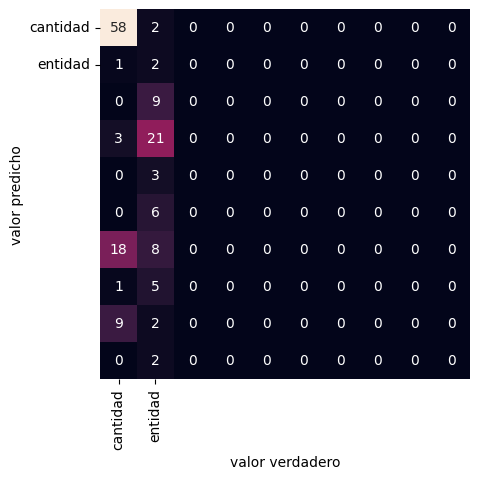

REPORTES DE CLASIFICACIÓN
              precision    recall  f1-score   support

           0       0.97      0.64      0.77        90
           1       0.67      0.03      0.06        60
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.40       150
   macro avg       0.16      0.07      0.08       150
weighted avg       0.85      0.40      0.49       150



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#Evaluación y reportes
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#Curva de Aprendizaje
import matplotlib.pyplot as plt
#% matplotlib inline
import seaborn as sns
#OBTENER DESEMPEÑO FIINAL
import numpy as np





# Combinar predicciones de cada batch en una lista
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
#Combinar las etiquetas correctas de cada batch en una lista
flat_true_labels = [item for sublist in true_labels for item in sublist]

print("EVALUACIÓN FINAL")

#Calcular valor de métrica Accuracy
acc_final = round(accuracy_score(flat_true_labels, flat_predictions),3)

print('ACCURACY SCORE FINAL - CONJUNTO TEST: {}', acc_final)

print('MATRIZ DE CONFUSIÓN')
mat = confusion_matrix(flat_true_labels, flat_predictions)
sns.heatmap(mat.T, square=True, annot=True, cbar=False, xticklabels=np.unique(etiq_train), yticklabels=np.unique(etiq_train),fmt='d' )
plt.xlabel('valor verdadero')
plt.ylabel('valor predicho');
plt.show();

print('REPORTES DE CLASIFICACIÓN')
print(classification_report(flat_true_labels,flat_predictions))

In [ ]:
FILE_NAME_CLF = "/PregMalClasif.csv"
FILE_NAME_NEW_CORPUS = "/NEW_CORPUS.csv"
# Guardar Resultados
DF_MAL_CLF =  pd.DataFrame(columns=["DS","Texto", "Predicho","Real"])
DF_OK =  pd.DataFrame(columns=["Texto", "Etiqueta"])

preds_labels_txt = revertir_etiquetas(flat_predictions)
real_labels_txt = revertir_etiquetas(flat_true_labels)

for preg, pred, real in zip(sentencias, preds_labels_txt, real_labels_txt):
  if pred != real:
    d = {'DS': DS_NAME, 'Texto': preg, 'Predicho': pred, 'Real':real}
    DF_MAL_CLF = pd.concat([DF_MAL_CLF, pd.DataFrame(d, index=[0])], ignore_index=True)
  else:
    d = {'Texto': preg.strip(), 'Etiqueta': pred}
    DF_OK = pd.concat([DF_OK, pd.DataFrame(d, index=[0])], ignore_index=True)

#DF_MAL_CLF.to_csv(FILE_NAME_CLF, index=None, mode="a", header=not os.path.isfile(FILE_NAME_CLF))

with open(output_dir_path + FILE_NAME_CLF, 'w') as f:
    DF_MAL_CLF.to_csv(f)

with open(output_dir_path + FILE_NAME_NEW_CORPUS, 'w') as f:
    DF_OK.to_csv(f)

print("Resultados guardados en:", output_dir_path)

ValueError: y contains previously unseen labels: [2 3 4 5 6 7 8 9]

In [ ]:
DF_OK

NameError: name 'DF_OK' is not defined

In [ ]:
#Cargar CSV de Afip
urlcsv = dirCSV + nameFileCVS
df = pd.read_csv(urlcsv, on_bad_lines='skip')

In [ ]:
df

,IUCA,Texto,Etiqueta
0,0,¿Puedo darme de baje por el tiempo en que no r...,si_no
1,0,"Si dejo de trabajar por un tiempo, ¿puedo darm...",si_no
2,0,¿Puedo dar de baja mi monotributo y transcurri...,si_no
3,0,¿Es obligatorio seguir inscripto en el régimen...,si_no
4,0,¿Qué sucede si me doy de baja y luego retomo m...,manera
...,...,...,...
1380,155,De encontrarse adherido al régimen de inclusió...,referencia
1381,156,¿Qué tipo de factura deben de emitir los monot...,referencia
1382,157,¿Cuál es la sanción por no exhibir la document...,manera
1383,158,¿Cuál es la sanción en caso de no poseer las f...,manera


In [ ]:
df=df.drop(['IUCA'], axis=1)

In [ ]:
df_final = pd.concat([df, DF_OK])

In [ ]:
duplicates = df_final[df_final['Texto'].duplicated(keep=False)]['Texto'].tolist()

In [ ]:
df1 = df_final[df_final.duplicated(keep=False)]

df1 = df1.groupby(df1.columns.tolist()).apply(lambda x: x.index.tolist()).values.tolist()
print (df1)

[[1273, 1304], [1264, 1319, 1337], [656, 665], [1116, 1122], [973, 982], [1684, 1685], [821, 835], [3952, 4307], [4303, 4308], [4305, 4306], [2124, 2126], [1271, 1340], [957, 1351], [1269, 1339], [1278, 1359], [577, 632], [1210, 1218], [1211, 1219], [1214, 1222], [905, 914], [754, 762], [1212, 1220], [1213, 1221], [130, 137], [3749, 3764], [1732, 1780], [1699, 1772], [1788, 1807], [1734, 1796], [3747, 3756], [3260, 3262], [2235, 2392], [3755, 3762], [3258, 3449], [1836, 1847], [1698, 2238], [1838, 1849], [1753, 2240], [1848, 1862], [3390, 3863], [3391, 3579], [3601, 3649], [3217, 3592], [1695, 1954], [2031, 2166], [3392, 3393], [1839, 1856], [1771, 1801], [3748, 3757], [1843, 1846], [352, 375], [2025, 2029], [3754, 3758], [362, 410], [343, 349], [576, 578], [3296, 3489], [3767, 3768], [3778, 3783], [1537, 1555], [229, 237], [242, 245], [236, 238], [233, 241], [235, 243], [3934, 4831], [2431, 2437], [565, 567], [1536, 1556], [2439, 2862], [2408, 2790], [2642, 2864], [2651, 2863], [2865,